In [1]:
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd
from iminuit import cost,Minuit
pd.options.display.max_colwidth = 100
pd.options.display.max_rows = None
pd.options.mode.chained_assignment = None  # default='warn'

import strax
import straxen

In [2]:
#Reading in the run, peak information saved locally
st = straxen.contexts.xenonnt_online(_auto_append_rucio_local=False)
st.storage = [
    strax.DataDirectory('C:/Users/keert/data_3hr_run', readonly=True),
    st.storage[0],
    strax.DataDirectory('./data_3hr_run', provide_run_metadata=False)
]

run_id = '062672'

In [3]:
#Saving all peak information (shape and position) to a structured array
peaks = st.get_array(run_id,("peak_basics","peak_positions_mlp"))


c:\users\keert\straxen\straxen\url_config.py:743: UserWarning: From straxen version 2.1.0 onward, URLConfig parameters will be sorted alphabetically before being passed to the plugins, this will change the lineage hash for non-sorted URLs. To load data processed with non-sorted URLs, you will need to use an older version.
  warnings.warn(


Loading plugins: |          | 0.00 % [00:00<?]

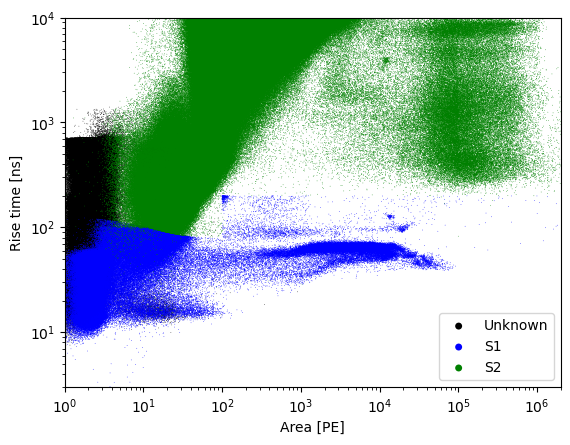

In [4]:
#Classifying peaks based on type of signal
st.plot_peak_classification(run_id)

In [5]:
run_time = (int(peaks["time"][-1])-int(peaks["time"][0]))*1e-9
print("Length of run:", run_time/3600,"hr")

Length of run: 3.0008736774083333 hr


In [6]:
def select_area(peaks,xrange,yrange,params=("area","range_50p_area")):
    """
    Makes a selection based on x and y range array based on any two parameters

    peaks = input array of peaks
    xrange = tuple of min and max x-axis values from plot from which data is selected
    yrange = tuple of min and max y-axis values from plot from which data is selected
    params = tuple of column titles in input peaks array of the parameters to be used for selection
    """
    low_x,high_x = xrange
    low_y,high_y = yrange
    param1,param2 = params
    select_peaks = peaks[
    (peaks[param1] > int(low_x))
    & (peaks[param1] < int(high_x))
    & (peaks[param2] > low_y)
    & (peaks[param2] < high_y)]
    return select_peaks

def plot_selection(xrange,yrange,axes,col):
    """Draws the selection as a filled in box on any plot
    
    xrange = tuple of min and max x-axis values from plot from which data is selected
    yrange = tuple of min and max y-axis values from plot from which data is selected
    axes = plot on which selection is to be visualized
    col = color of the filled in box
    """
    low_x,high_x = xrange
    low_y,high_y = yrange
    x = np.arange(low_x, high_x, 50)
    y = np.full(len(x), low_y)
    y2 = np.full(len(x), high_y)
    axes.fill_between(x, y, y2, alpha=0.5, color=col)
    return axes

72767
1947132


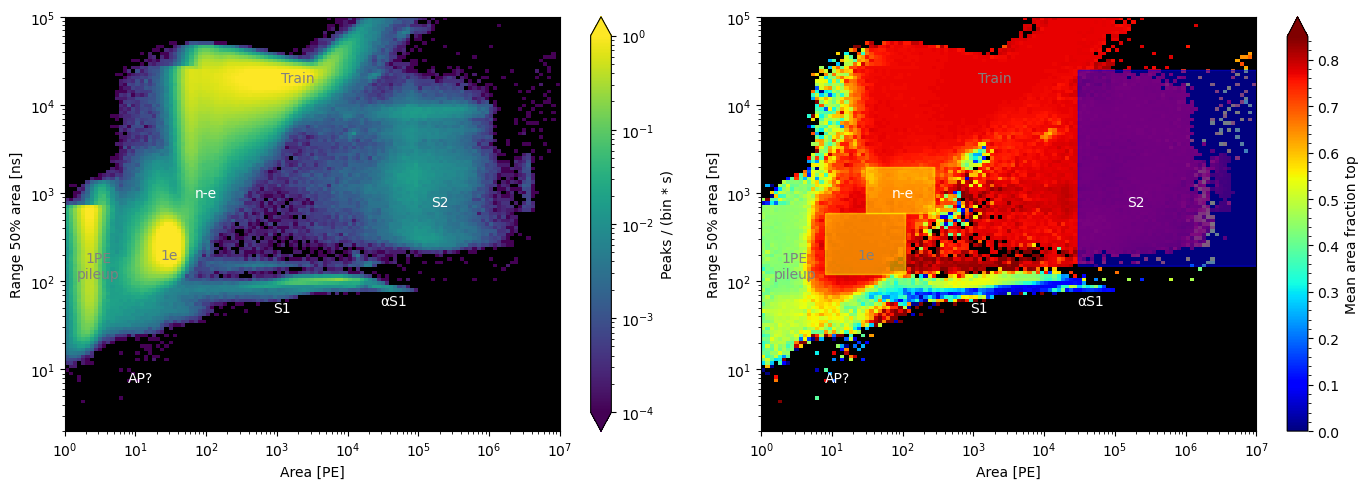

In [17]:
#following function produces two plots:
#1. Bins the peaks based on area and width containing 50% of the peak shape (range_50p_area)
#2. Plots a colourmap of the area, width and area fraction top (AFT) of the peak
#i.e. the fraction of the light seen by the top vs. bottom PMT array
#Both plots includes a classification of the peaks based on these parameters

st.plot_peaks_aft_histogram(run_id)

#Selecting largest S2 peaks from the classification plots
s2_peaks = select_area(peaks,(3e4,1e7),(1.5e2,2.5e4))

print(len(s2_peaks))

#Selecting regions containing majority single electrons (1e)  from the classification plot
se_peaks1 = select_area(peaks,(8e0,1.5e2),(1.2e2,6e2))  
#Selecting regions containing majority few electrons (ne) from the classification plot
se_peaks2 = select_area(peaks,(3e1,3e2),(6e2,2e3))     #include few ne

#visualizing the selections
ax = plt.gca()

plot_selection((3e4,1e7),(1.5e2,2.5e4),ax,"blue")
plot_selection((8e0,1.5e2),(1.2e2,6e2),ax,"yellow")
plot_selection((3e1,3e2),(6e2,2e3),ax,"yellow")

#combining se and ne peaks together, rearrange in order of time occuring in run
se_peaks = np.sort(np.concatenate((se_peaks1, se_peaks2)), order='time')

print(len(se_peaks))
plt.savefig("C:/Users/keert/Downloads/peak_selection.png",format="png")

In [10]:
#saving the selected peaks
np.save("C:/Users/keert/data_3hr_run/s2_run_3hr.npy",s2_peaks)
np.save("C:/Users/keert/data_3hr_run/se_run_3hr.npy",se_peaks1)
np.save("C:/Users/keert/data_3hr_run/ne_run_3hr.npy",se_peaks2)